In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
train_fn = '../out/memorization/head_train_scored.csv'
valid_fn = '../out/memorization/head_val_scored.csv'

In [35]:
train_df = pd.read_csv(train_fn, header=[0])
train_df = train_df[~train_df.suffix.isna()]
train_df.head()

,line,prefix,suffix,generated
0,0,"It is done, and submitted. You can play “Survi...","mutations over time, with the most apt permut...","events, and the player has no control over it..."
1,1,"<?xml version=""1.0"" encoding=""UTF-8""?>\n <segm...",>PD1.2</name>\n <description>Livin...,>PD1.2</name>\n
2,2,Article content Human behavior has a tremendo...,buy at or near market tops for fear of not do...,chase the same trends. “The market is a herd...
4,4,About Grand Slam Fishing Charters As a family...,their own personalities and sense of humour a...,their own specialties and are always willing ...
5,5,Q: Why was Mundungus banned from the Hog's He...,"maybe Dung was trading with Aberforth, Sirius...",it's possible that Dung was banned for someth...


In [36]:
valid_df = pd.read_csv(valid_fn, header=[0])
valid_df = valid_df[~valid_df.suffix.isna()]
valid_df.head()

,line,prefix,suffix,generated
0,0,Catalonia election: Puigdemont calls for talks...,'s biggest party. although pro-independence pa...,"'s biggest party. Mr Puigdemont's party, Junt..."
1,1,"Wirex, a prominent UK’s FCA supported cryptocu...","cross-border remittance, just like the IBM St...",remittance services. The stablecoins will be...
2,2,"Effect of sleep quality on memory, executive f...",objective and subjective sleep parameters amo...,"groups in terms of sleep quality, sleep laten..."
4,4,Fluorescent labeling of both GABAergic and gly...,. We found higher expression level of Venus tr...,. The expression of Venus was observed in the ...
5,5,Q: How to avoid anti-clockwise rotation anima...,-webkit-box-sizing: border-box; -moz-box...,


In [37]:
len(train_df), len(valid_df)

(15675, 10680)

In [38]:
from transformers import AutoModelForCausalLM, AutoTokenizer
model_name = 'EleutherAI/gpt-j-6B'
tokenizer = AutoTokenizer.from_pretrained(model_name, truncation_side='left')

In [39]:
def get_prefix(l1, l2):
    for i, j in enumerate(zip(l1, l2)):
        if l1[i] != l2[i]:
            break
    return i

def get_shared_prefix(df):
    prefixes = []
    for i, row in df.iterrows():
        if type(row['suffix']) != str:
            prefixes.append(0)
            continue
            
        suffix, generated = tokenizer(row['suffix'])['input_ids'], tokenizer(row['generated'])['input_ids']
        prefix = get_prefix(suffix, generated)
        prefixes.append(prefix)
    
    return prefixes

In [40]:
train_df['shared_prefix_len'] = get_shared_prefix(train_df)

In [41]:
valid_df['shared_prefix_len'] = get_shared_prefix(valid_df)

In [42]:
train_df['shared_prefix_len'].mean(), train_df['shared_prefix_len'].sem()

(2.5340350877192983, 0.03593540820439648)

In [43]:
valid_df['shared_prefix_len'].mean(), valid_df['shared_prefix_len'].sem()

(2.493071161048689, 0.04290424695920665)

In [54]:
np.sum(train_df['shared_prefix_len'] > 1) / len(train_df)

0.3663157894736842

In [55]:
np.std(train_df['shared_prefix_len'] > 1) / np.sqrt(len(train_df))

0.003848225273805538

In [56]:
np.sum(valid_df['shared_prefix_len'] > 1) / len(valid_df)

0.36170411985018724

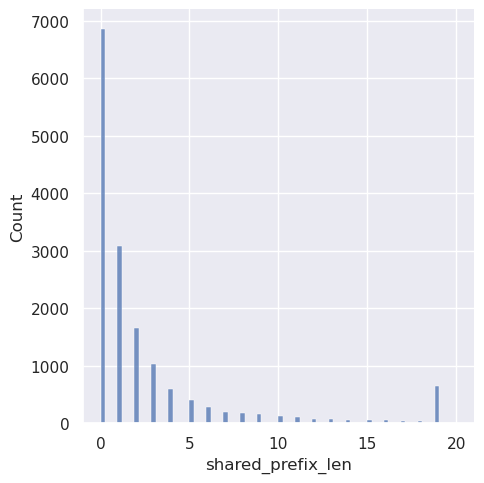

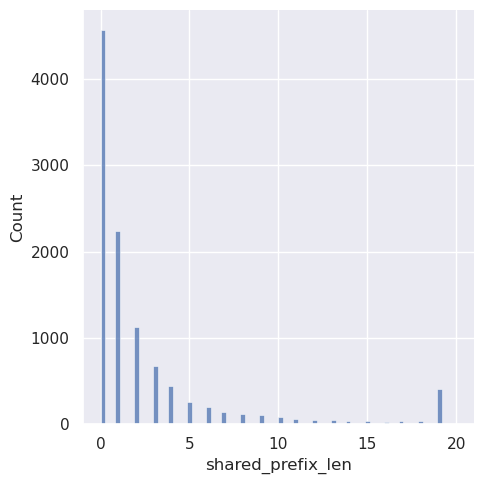

In [49]:
sns.displot(train_df['shared_prefix_len'], label='train')
sns.displot(valid_df['shared_prefix_len'], label='valid')